In [6]:
import os.path, json, io
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (50, 50)

from retrying import retry # for exponential back down when calling TurboOverdrive API
import pandas as pd
from geopandas import GeoDataFrame # Loading boundaries Data
from shapely.geometry import Point, Polygon, shape # creating geospatial data
from shapely import wkb, wkt # creating and parsing geospatial data
from ast import literal_eval as make_tuple # used to decode data from java

In [2]:
df = pd.read_csv('C:/PFE/crimes10K.csv')         
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10330937,HY521594,12/01/2015 11:54:00 PM,064XX S MORGAN ST,0560,ASSAULT,SIMPLE,STREET,True,False,...,16.0,68.0,08A,1170754.0,1862049.0,2015,02/10/2018 03:50:01 PM,41.776940,-87.649569,"(41.776939754, -87.649569115)"
1,10562534,HZ309656,06/09/2016 09:00:00 AM,001XX N CARPENTER ST,0810,THEFT,OVER $500,PARKING LOT/GARAGE(NON.RESID.),False,False,...,27.0,28.0,06,1169444.0,1900868.0,2016,02/10/2018 03:50:01 PM,41.883491,-87.653245,"(41.883491313, -87.653244922)"
2,6345304,HP433018,07/04/2008 05:00:00 PM,063XX S COAST GUARD DR,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,True,False,...,5.0,42.0,15,1191158.0,1863398.0,2008,02/28/2018 03:56:25 PM,41.780172,-87.574726,"(41.780171969, -87.574725996)"
3,2316888,HH600936,08/24/2002 12:11:31 AM,029XX N KILDARE AVE,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,...,31.0,20.0,05,1147090.0,1919220.0,2002,02/28/2018 03:56:25 PM,41.934308,-87.734861,"(41.934307858, -87.734860761)"
4,9575513,HX226071,04/16/2014 06:40:00 PM,016XX E HYDE PARK BLVD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39.0,08B,1188001.0,1871507.0,2014,02/10/2018 03:50:01 PM,41.802500,-87.586041,"(41.802499513, -87.586041451)"


In [3]:
# Load the boundaries data
geo_df = GeoDataFrame.from_file('C:/PFE/crimes10K.csv')
geo_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,geometry
0,10330937,HY521594,12/01/2015 11:54:00 PM,064XX S MORGAN ST,0560,ASSAULT,SIMPLE,STREET,true,false,...,68,08A,1170754,1862049,2015,02/10/2018 03:50:01 PM,41.776939754,-87.649569115,"(41.776939754, -87.649569115)",None
1,10562534,HZ309656,06/09/2016 09:00:00 AM,001XX N CARPENTER ST,0810,THEFT,OVER $500,PARKING LOT/GARAGE(NON.RESID.),false,false,...,28,06,1169444,1900868,2016,02/10/2018 03:50:01 PM,41.883491313,-87.653244922,"(41.883491313, -87.653244922)",None
2,6345304,HP433018,07/04/2008 05:00:00 PM,063XX S COAST GUARD DR,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,true,false,...,42,15,1191158,1863398,2008,02/28/2018 03:56:25 PM,41.780171969,-87.574725996,"(41.780171969, -87.574725996)",None
3,2316888,HH600936,08/24/2002 12:11:31 AM,029XX N KILDARE AVE,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,false,false,...,20,05,1147090,1919220,2002,02/28/2018 03:56:25 PM,41.934307858,-87.734860761,"(41.934307858, -87.734860761)",None
4,9575513,HX226071,04/16/2014 06:40:00 PM,016XX E HYDE PARK BLVD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,false,true,...,39,08B,1188001,1871507,2014,02/10/2018 03:50:01 PM,41.802499513,-87.586041451,"(41.802499513, -87.586041451)",None


In [4]:
geo_df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'geometry'],
      dtype='object')

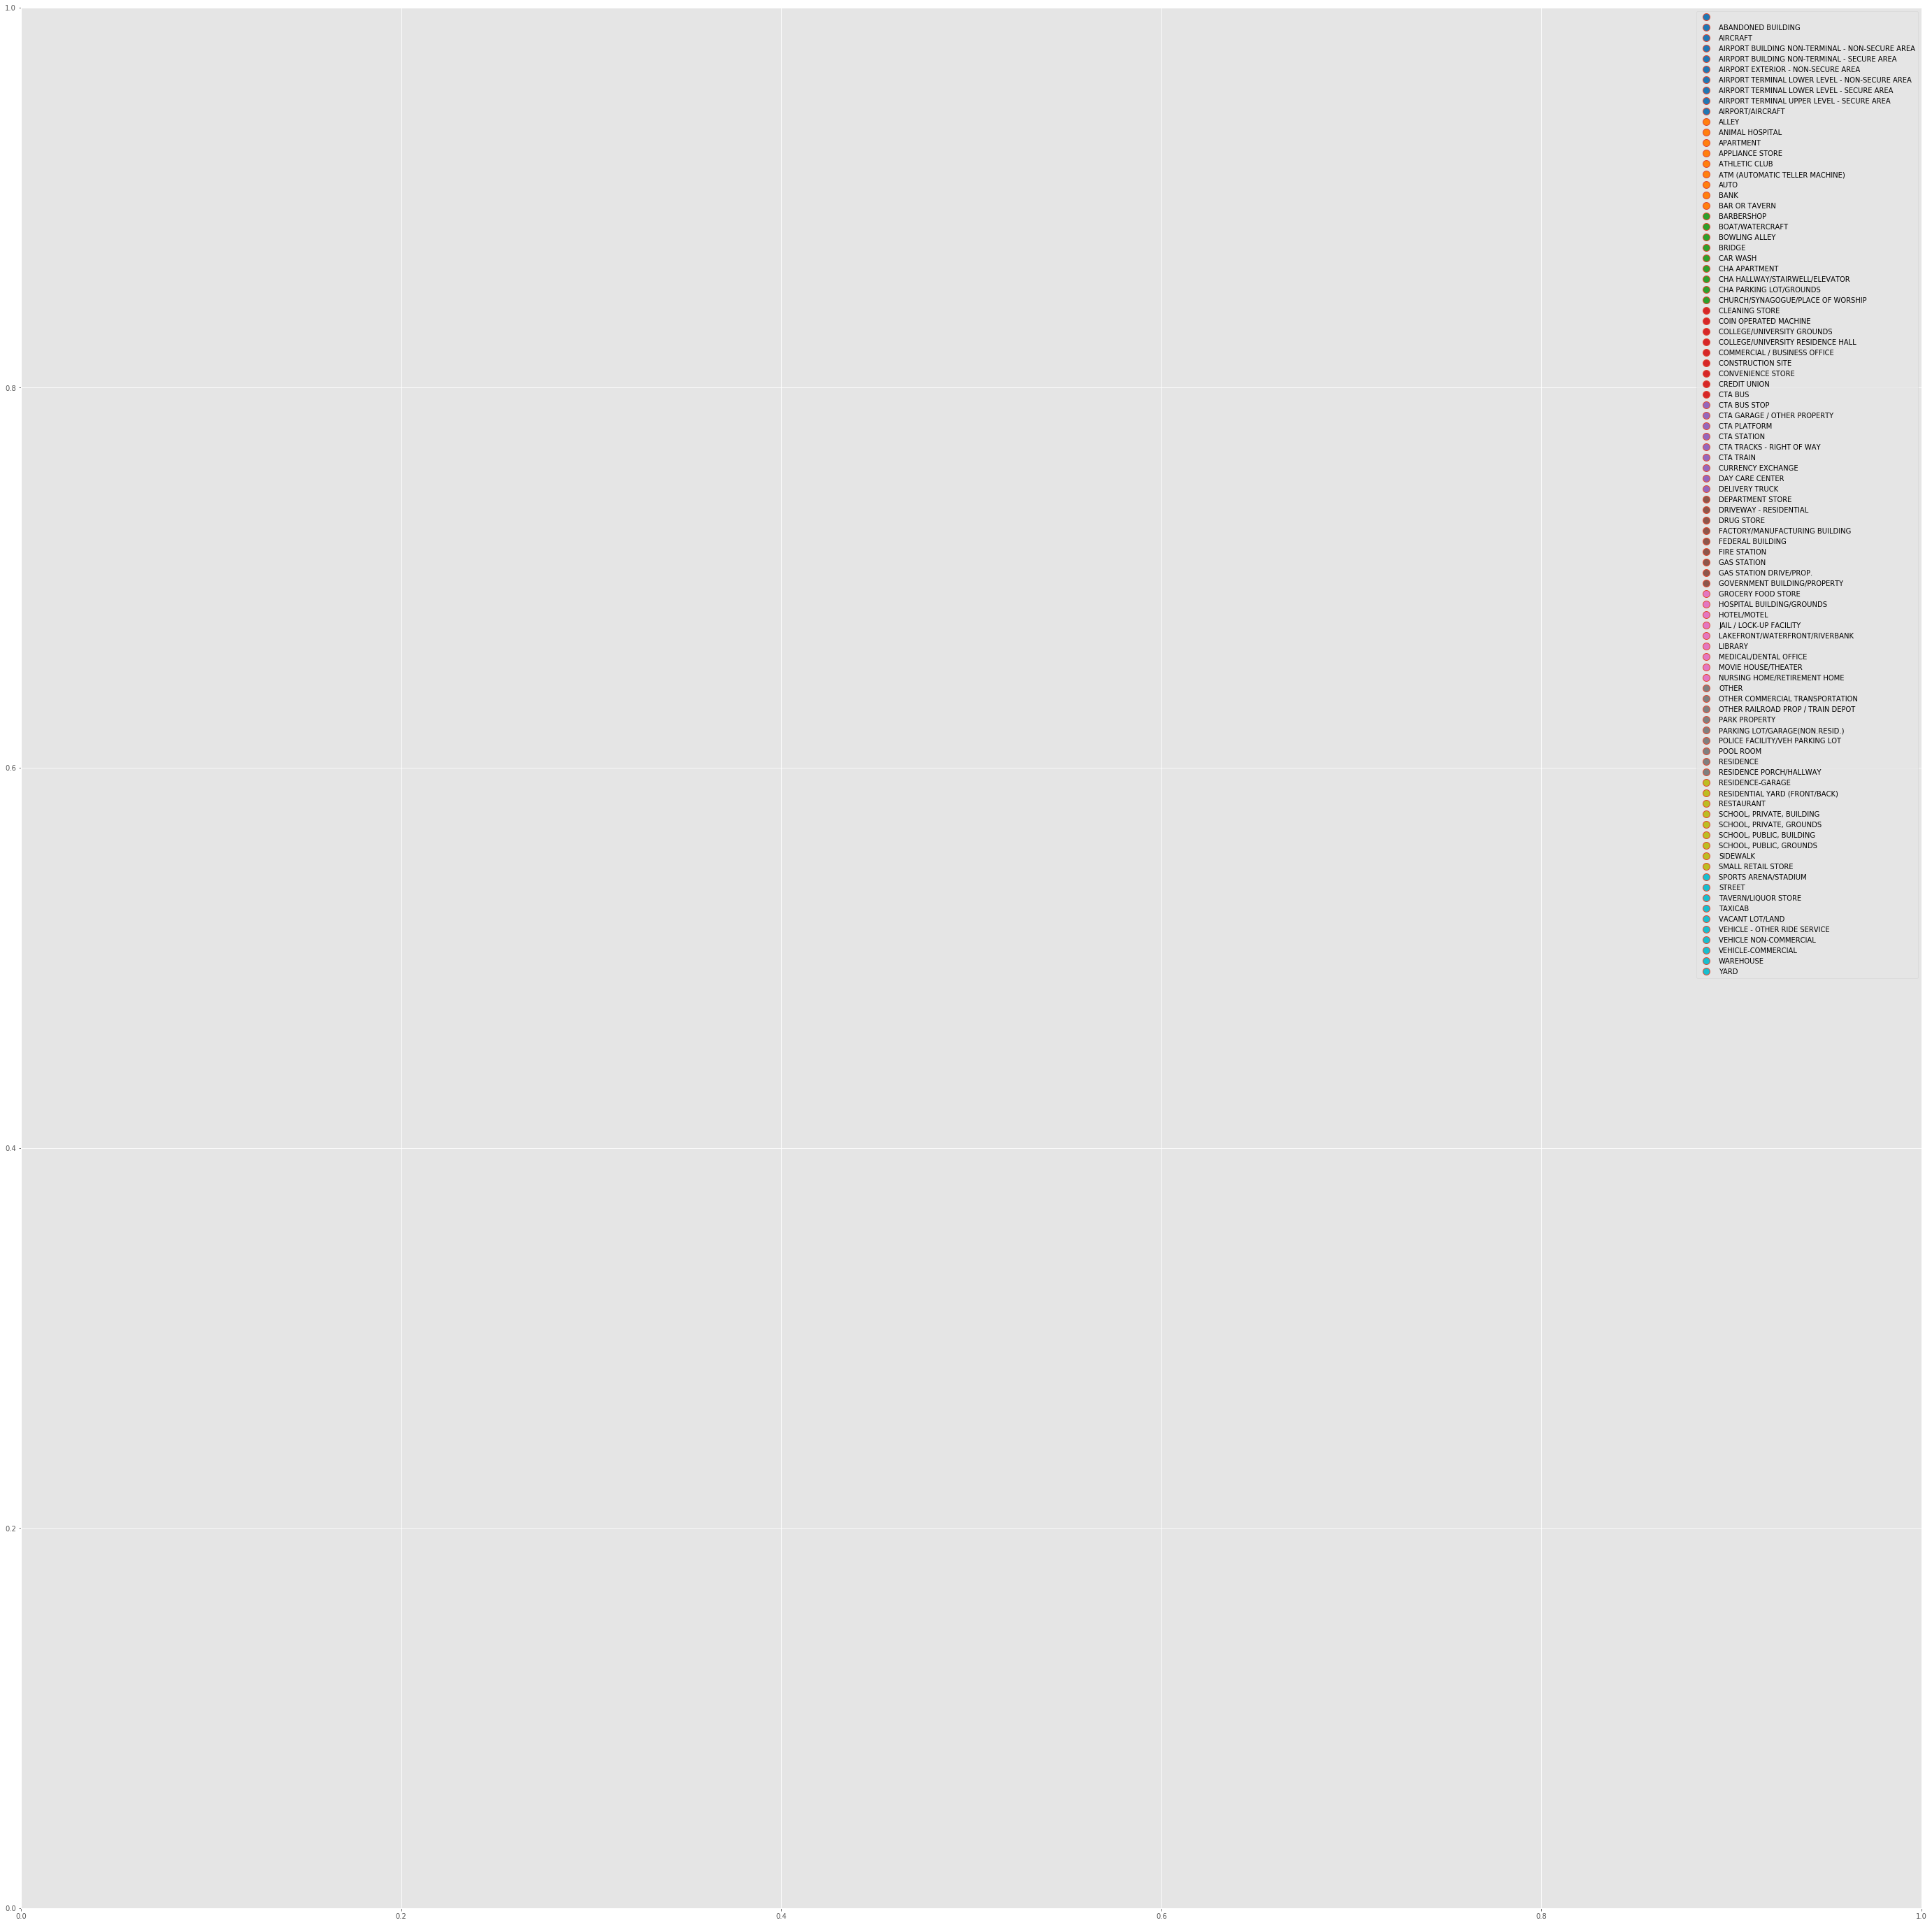

In [7]:
geo_df.plot(column='Location Description', categorical=True, legend=True)
plt.show()

In [9]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
gdf = geopandas.GeoDataFrame(
    df, geometry=[Point(x, y) for x, y in zip(df.Longitude, df.Latitude)])
gdf.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,geometry
0,10330937,HY521594,12/01/2015 11:54:00 PM,064XX S MORGAN ST,0560,ASSAULT,SIMPLE,STREET,True,False,...,68.0,08A,1170754.0,1862049.0,2015,02/10/2018 03:50:01 PM,41.776940,-87.649569,"(41.776939754, -87.649569115)",POINT (-87.64956911500001 41.776939754)
1,10562534,HZ309656,06/09/2016 09:00:00 AM,001XX N CARPENTER ST,0810,THEFT,OVER $500,PARKING LOT/GARAGE(NON.RESID.),False,False,...,28.0,06,1169444.0,1900868.0,2016,02/10/2018 03:50:01 PM,41.883491,-87.653245,"(41.883491313, -87.653244922)",POINT (-87.65324492200001 41.883491313)
2,6345304,HP433018,07/04/2008 05:00:00 PM,063XX S COAST GUARD DR,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,True,False,...,42.0,15,1191158.0,1863398.0,2008,02/28/2018 03:56:25 PM,41.780172,-87.574726,"(41.780171969, -87.574725996)",POINT (-87.574725996 41.780171969)
3,2316888,HH600936,08/24/2002 12:11:31 AM,029XX N KILDARE AVE,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,...,20.0,05,1147090.0,1919220.0,2002,02/28/2018 03:56:25 PM,41.934308,-87.734861,"(41.934307858, -87.734860761)",POINT (-87.73486076100001 41.934307858)
4,9575513,HX226071,04/16/2014 06:40:00 PM,016XX E HYDE PARK BLVD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,39.0,08B,1188001.0,1871507.0,2014,02/10/2018 03:50:01 PM,41.802500,-87.586041,"(41.802499513, -87.586041451)",POINT (-87.586041451 41.802499513)


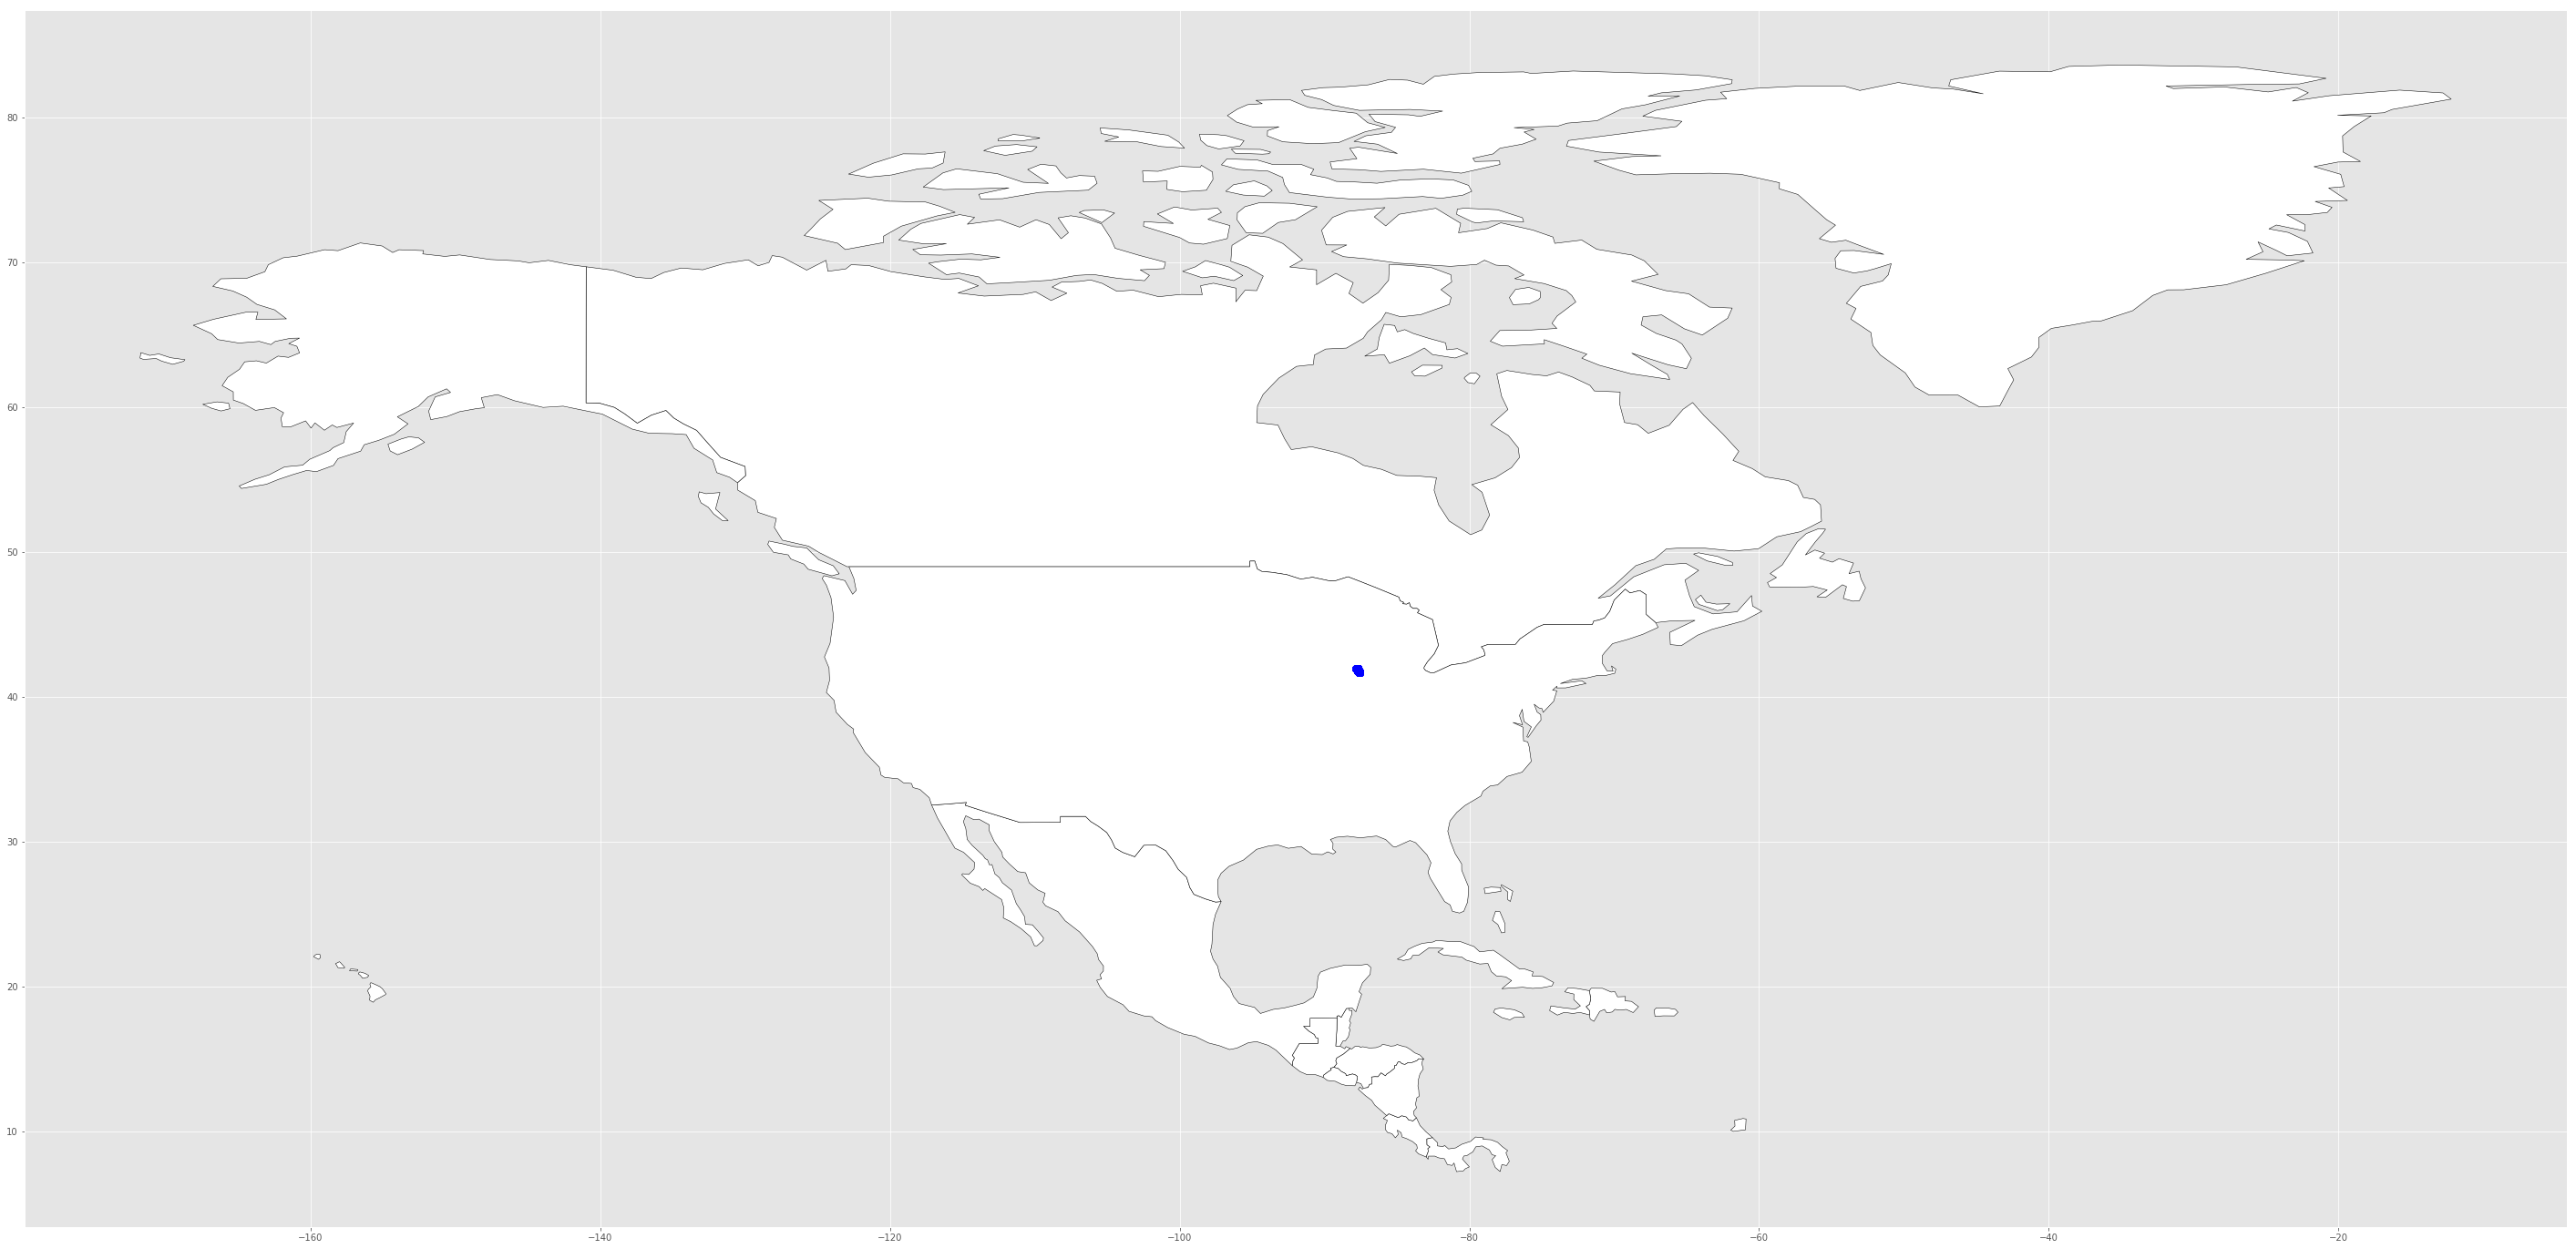

In [10]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'North America'].plot(color='white', edgecolor='black')
gdf.plot(ax=ax, color='blue')

In [13]:
gdf.crs = {'init': 'epsg:4326'}
gdf.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,geometry
0,10330937,HY521594,12/01/2015 11:54:00 PM,064XX S MORGAN ST,0560,ASSAULT,SIMPLE,STREET,True,False,...,68.0,08A,1170754.0,1862049.0,2015,02/10/2018 03:50:01 PM,41.776940,-87.649569,"(41.776939754, -87.649569115)",POINT (-87.64956911500001 41.776939754)
1,10562534,HZ309656,06/09/2016 09:00:00 AM,001XX N CARPENTER ST,0810,THEFT,OVER $500,PARKING LOT/GARAGE(NON.RESID.),False,False,...,28.0,06,1169444.0,1900868.0,2016,02/10/2018 03:50:01 PM,41.883491,-87.653245,"(41.883491313, -87.653244922)",POINT (-87.65324492200001 41.883491313)


C:\Users\rzouga\Anaconda3\lib\site-packages\mapclassify\classifiers.py:138: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
C:\Users\rzouga\Anaconda3\lib\site-packages\mapclassify\classifiers.py:140: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


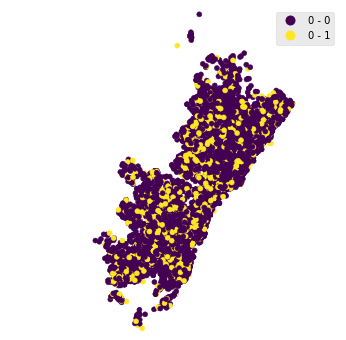

In [17]:
import geoplot.crs as gcrs
world = geopandas.read_file(gplt.datasets.get_path('world'))
ax = gplt.polyplot(world, projection=gcrs.AlbersEqualArea())
gplt.pointplot(gdf, ax=ax, hue='Arrest', legend=True)

C:\Users\rzouga\Anaconda3\lib\site-packages\geoplot\geoplot.py:231: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  f'Please specify "legend_var" explicitly when both "hue" and "scale" are '


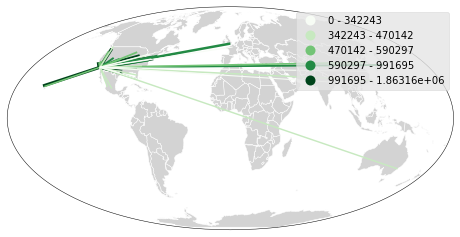

In [18]:
import geoplot as gplt
import geoplot.crs as gcrs
import geopandas as gpd
la_flights = gpd.read_file(gplt.datasets.get_path('la_flights'))
world = gpd.read_file(gplt.datasets.get_path('world'))
ax = gplt.sankey(
    la_flights, projection=gcrs.Mollweide(),
    scale='Passengers', hue='Passengers', cmap='Greens', legend=True
)
gplt.polyplot(
    world, ax=ax, facecolor='lightgray', edgecolor='white'
)
ax.set_global(); ax.outline_patch.set_visible(True)